# Analyze MTurk MOS Scores

This repository analyzes MOS scores from MTurk through several different lens. The expected CSV is to be downloaded from MTurk.

TODO:
* Compute a confidence interval via the crowdMOS algorithm.

In [1]:
%matplotlib inline

from IPython.display import display
from IPython.display import Markdown

import pandas


data_frame = pandas.read_csv('../../data/Batch_3716244_batch_results.csv')
data_frame.columns

Index(['HITId', 'HITTypeId', 'Title', 'Description', 'Keywords', 'Reward',
       'CreationTime', 'MaxAssignments', 'RequesterAnnotation',
       'AssignmentDurationInSeconds', 'AutoApprovalDelayInSeconds',
       'Expiration', 'NumberOfSimilarHITs', 'LifetimeInSeconds',
       'AssignmentId', 'WorkerId', 'AssignmentStatus', 'AcceptTime',
       'SubmitTime', 'AutoApprovalTime', 'ApprovalTime', 'RejectionTime',
       'RequesterFeedback', 'WorkTimeInSeconds', 'LifetimeApprovalRate',
       'Last30DaysApprovalRate', 'Last7DaysApprovalRate', 'Input.audio_url',
       'Input.transcript', 'Answer.audio-naturalness.label', 'Approve',
       'Reject'],
      dtype='object')

In [2]:
data_frame = data_frame[~data_frame['Reject'].notnull()]
display(Markdown('Number of respones:'))
len(data_frame)

Number of respones:

202

In [3]:
import requests

def get_audio_length(audio_url, bits=16, sample_rate=24000):
    """ Compute the audio length in seconds from `audio_url`.
    """
    response = requests.get(audio_url)
    return len(response.content) / sample_rate / bits * 4
    
data_frame['audio_length'] = data_frame['Input.audio_url'].apply(get_audio_length)

In [4]:
import statistics
display(Markdown('Time to complete task (in minutes):'))
(data_frame["WorkTimeInSeconds"] / 60).describe()

Time to complete task (in minutes):

count    202.000000
mean       4.115264
std        5.762588
min        0.100000
25%        0.383333
50%        3.383333
75%        5.116667
max       53.216667
Name: WorkTimeInSeconds, dtype: float64

In [5]:
# NOTE: Based on the crowdMOS paper, it's useful to reject people that don't listen to the entire clip via
# the `WorkTimeInSeconds` metric.
display(Markdown('Fastest completion times (in seconds):'))
pandas.set_option('display.max_colwidth', -1)
data_frame['WorkTimeInSecondsPerAudioSecond'] = data_frame['WorkTimeInSeconds'] / data_frame['audio_length']
top = data_frame.sort_values(by=['WorkTimeInSecondsPerAudioSecond'])[:20]
top[['WorkTimeInSeconds', 'WorkerId', 'Input.audio_url', 'audio_length', 'WorkTimeInSecondsPerAudioSecond']]

Fastest completion times (in seconds):

,WorkTimeInSeconds,WorkerId,Input.audio_url,audio_length,WorkTimeInSecondsPerAudioSecond
28,12,A5E2P5F1AXYZ1,"https://storage.googleapis.com/mturk-samples/2019-07-25/beth_cameron_(custom),index_6953.wav",7.325604,1.638090
163,15,A3GAQNTZ1V1VO,"https://storage.googleapis.com/mturk-samples/2019-07-25/linda_johnson,index_3549.wav",9.150604,1.639236
91,18,A1HNR6OIRFCEHS,"https://storage.googleapis.com/mturk-samples/2019-07-25/adrienne_walker-heller,index_2219.wav",10.600604,1.698016
167,11,A3GAQNTZ1V1VO,"https://storage.googleapis.com/mturk-samples/2019-07-25/beth_cameron_(custom),index_5311.wav",6.413104,1.715238
147,19,APY5858P6BTDY,"https://storage.googleapis.com/mturk-samples/2019-07-25/frank_bonacquisti,index_7184.wav",11.025604,1.723262
54,17,A3GAQNTZ1V1VO,"https://storage.googleapis.com/mturk-samples/2019-07-25/frank_bonacquisti,index_2262.wav",9.800604,1.734587
64,13,A3GAQNTZ1V1VO,"https://storage.googleapis.com/mturk-samples/2019-07-25/frank_bonacquisti,index_6413.wav",7.325604,1.774598
37,15,A2EVTBJG1Z9TCP,"https://storage.googleapis.com/mturk-samples/2019-07-25/adrienne_walker-heller,index_4845.wav",8.325604,1.801671
211,16,A27PBC5O3Z5ZED,"https://storage.googleapis.com/mturk-samples/2019-07-25/adrienne_walker-heller,index_4009.wav",8.775604,1.823236
219,17,A2EVTBJG1Z9TCP,"https://storage.googleapis.com/mturk-samples/2019-07-25/susan_murphy,index_676.wav",9.225604,1.842698


In [6]:
def label_to_score(label):
    """ Get the MOS score from the MOS label.
    """
    tokens = label.lower().split()
    if 'excellent' in tokens:
        return 5.0
    elif 'good' in tokens:
        return 4.0
    elif 'fair' in tokens:
        return 3.0
    elif 'poor' in tokens:
        return 2.0
    elif 'bad' in tokens:
        return 1.0
    raise ValueError()

data_frame['MOS'] = data_frame['Answer.audio-naturalness.label'].apply(label_to_score)
display(Markdown('Mean opinion score:'))
data_frame['MOS'].describe()

Mean opinion score:

count    202.000000
mean     4.277228  
std      0.754671  
min      2.000000  
25%      4.000000  
50%      4.000000  
75%      5.000000  
max      5.000000  
Name: MOS, dtype: float64

In [7]:
import numpy as np 
import scipy.stats

def sample_mean_confidence_interval(data, confidence=0.95):
    # NOTE: This is a similar approach to computing a confidence interval as the Tacotron 2 approach.
    # Inspired by: https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data
    data = np.array(data)
    a, b = scipy.stats.t.interval(confidence, len(data)-1, loc=np.mean(data), scale=scipy.stats.sem(data))
    return np.mean(data), (b - a) / 2

'95 percent confidence interval: %f ± %f' % sample_mean_confidence_interval(data_frame["MOS"].tolist())

'95 percent confidence interval: 4.277228 ± 0.104702'

Mean opinion score distribution:

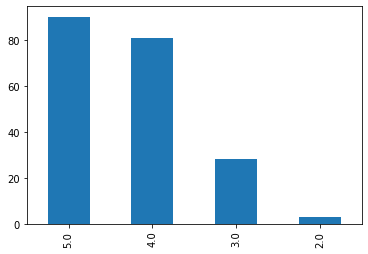

In [8]:
display(Markdown('Mean opinion score distribution:'))
pandas.value_counts(data_frame['MOS']).plot.bar()

In [9]:
# NOTE: It's important to have a number of unique workers to eliminate bias.
display(Markdown('Number of workers:'))
data_frame['WorkerId'].nunique()

Number of workers:

22

In [10]:
# NOTE: It may be useful to disregard workers who completed only one HIT. 
display(Markdown('Worker MOS score distribution:'))
data_frame.groupby('WorkerId')['MOS'].describe().sort_values(by=['count', 'mean'])

Worker MOS score distribution:

,count,mean,std,min,25%,50%,75%,max
WorkerId,,,,,,,,
ADXRJFEHIDXRE,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
A2JP9IKRHNLRPI,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
A2NI2HSU84PHJW,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
A2TDK0LD62WZ8Y,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
A3DFL72CC0P7UE,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
A3LL096CAY5WHB,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
AKSJ3C5O3V9RB,1.0,4.000000,NaN,4.0,4.0,4.0,4.00,4.0
A2RMJNF6IPI42F,1.0,5.000000,NaN,5.0,5.0,5.0,5.00,5.0
A326O3VWP8TO8N,2.0,5.000000,0.000000,5.0,5.0,5.0,5.00,5.0


In [11]:
# NOTE: It may be useful to disregard workers who had a substantially different ratings.
display(Markdown('Worker MOS score distribution:'))
data_frame.groupby('WorkerId')['MOS'].describe().sort_values(by=['mean'])

Worker MOS score distribution:

,count,mean,std,min,25%,50%,75%,max
WorkerId,,,,,,,,
ADXRJFEHIDXRE,1.0,2.000000,NaN,2.0,2.0,2.0,2.00,2.0
A2JP9IKRHNLRPI,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
A2TDK0LD62WZ8Y,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
A2NI2HSU84PHJW,1.0,3.000000,NaN,3.0,3.0,3.0,3.00,3.0
A3GAQNTZ1V1VO,7.0,3.428571,0.975900,2.0,3.0,3.0,4.00,5.0
A30YR5TPOKQYXJ,11.0,3.454545,0.687552,3.0,3.0,3.0,4.00,5.0
A2EVTBJG1Z9TCP,5.0,3.600000,0.894427,3.0,3.0,3.0,4.00,5.0
A1HNR6OIRFCEHS,13.0,3.692308,0.480384,3.0,3.0,4.0,4.00,4.0
A5E2P5F1AXYZ1,4.0,3.750000,0.957427,3.0,3.0,3.5,4.25,5.0


In [12]:
def audio_url_to_score(url):
    filename = url.split('/')[-1]
    return filename.split(',')[0]
    
display(Markdown('Speaker MOS score distribution:'))
data_frame['Speaker'] = data_frame['Input.audio_url'].apply(audio_url_to_score)
data_frame.groupby('Speaker')['MOS'].describe().sort_values(by=['mean'])

Speaker MOS score distribution:

,count,mean,std,min,25%,50%,75%,max
Speaker,,,,,,,,
beth_cameron,20.0,3.900000,0.788069,2.0,3.75,4.0,4.00,5.0
judy_bieber,20.0,4.000000,0.725476,3.0,3.75,4.0,4.25,5.0
mary_ann,12.0,4.000000,0.953463,2.0,3.75,4.0,5.00,5.0
beth_cameron_(custom),25.0,4.040000,0.734847,2.0,4.00,4.0,4.00,5.0
susan_murphy,12.0,4.083333,0.668558,3.0,4.00,4.0,4.25,5.0
heather_doe,18.0,4.277778,0.826442,3.0,4.00,4.5,5.00,5.0
adrienne_walker-heller,20.0,4.300000,0.656947,3.0,4.00,4.0,5.00,5.0
frank_bonacquisti,24.0,4.500000,0.722315,3.0,4.00,5.0,5.00,5.0
sam_scholl,13.0,4.615385,0.506370,4.0,4.00,5.0,5.00,5.0


MOS by audio length:

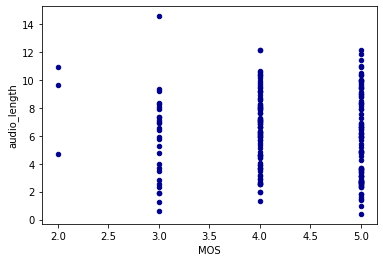

In [13]:
# NOTE: There may be a correlation of audio length to MOS score.
# TODO: Plot `audio_length` on the x axis to better see the correlation.
display(Markdown('MOS by audio length:'))
data_frame.plot.scatter(x='MOS', y='audio_length', c='DarkBlue')

import matplotlib.pyplot as plt
plt.show()

Density of time taken to complete a task:

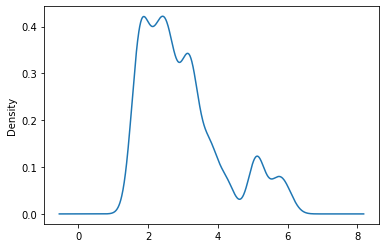

In [28]:
# NOTE: This may be useful for determining the time taken to complete a task.
display(Markdown('Density of time taken to complete a task:'))
# NOTE: Remove outliers.
# For example, it doesn't make sense to take 250 (4 minutes) seconds to review a 10 second clip. Workers that take
# so long to complete a task, may be working on multiple tasks at a time.
# NOTE (Michael 07-25-2019): From a previous analysis it looks like many workers are able to complete a task in
# 3 - 4x the audio time.
most_time = data_frame['WorkTimeInSecondsPerAudioSecond'][data_frame['WorkTimeInSecondsPerAudioSecond'] < 6]
most_time.plot.kde(bw_method=0.2)